# Black Hole Mass Estimation

Student: Ridha Fathima Mohideen Malik

Instructor: Isidora Jankov

### Imports

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [168]:
shen11_500 = pd.read_csv('shen_subsample_500.csv', sep=',')
shen11_500.head()

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,W_BHb_,e_W_BHb_,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,4399.3,330.1,62.0,3.1,23.06,8.33,0.07,-1.20
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,2371.4,541.6,89.4,8.7,15.06,7.59,0.20,-0.87
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,10756.6,4366.4,32.1,3.4,16.27,9.05,0.35,-2.03
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,15241.3,362.8,118.7,6.3,19.79,9.36,0.02,-2.33
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,1385.6,48.6,52.5,2.9,15.96,7.29,0.03,-0.23


### 1. a) Crossmatching with SDSS for z and $H_\beta$ flux

In [184]:
from astroquery.sdss import SDSS

with open('query.txt', 'r') as file:
    query = file.read().replace('\n', '') ## input is a single string

cat = SDSS.query_sql(query).to_pandas()

cat

/home/ridha-mm/agn/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


,plate,mjd,fiberid,z,subclass,e_bv_sfd,h_beta_flux,sigma_balmer
0,266,51630,133,0.367843,b'BROADLINE',0.047315,6.983765e+01,500.0000
1,266,51630,538,0.356625,b'',0.190163,1.757440e+00,1.0000
2,267,51608,593,0.163124,b'BROADLINE',0.026719,9.310896e+01,500.0000
3,269,51910,101,0.187017,b'BROADLINE',0.038754,4.153362e+01,174.6909
4,280,51612,388,0.287061,b'STARBURST BROADLINE',0.038379,1.254496e+02,500.0000
...,...,...,...,...,...,...,...,...
22169,2952,54559,543,0.313280,b'STARBURST BROADLINE',0.043543,3.577843e+02,500.0000
22170,2955,54562,438,0.452147,b'BROADLINE',0.061001,4.512493e+02,500.0000
22171,2960,54561,635,0.407190,b'',0.029855,1.238833e+09,333.6852
22172,2969,54586,507,0.168101,b'STARBURST BROADLINE',0.041897,6.688373e+02,500.0000


In [185]:
for id_shen11_500, plate_shen11_500, mjd_shen11_500, fiber_shen11_500 in zip(shen11_500.index, shen11_500['Plate'], shen11_500['MJD'], shen11_500['Fiber']):
        for id_cat, plate_cat, mjd_cat, fiber_cat in zip(cat.index, cat['plate'], cat['mjd'], cat['fiberid']):
                if plate_cat == plate_shen11_500 and mjd_cat == mjd_shen11_500 and fiber_cat == fiber_shen11_500:
                        shen11_500.loc[id_shen11_500, 'found'] = "yes"
                        shen11_500.loc[id_shen11_500, 'z'] = cat.loc[id_cat, 'z']
                        ## sdss flux is in 10**-17 erg/cm2/s
                        shen11_500.loc[id_shen11_500, 'Flux_Hb'] = 10**-17 * cat.loc[id_cat, 'h_beta_flux'] 
                        ## velocity dispersion to FWHM
                        shen11_500.loc[id_shen11_500, 'FWHM_Hb'] = 2.36 * cat.loc[id_cat, 'sigma_balmer']

In [232]:
match = shen11_500[shen11_500['found']=="yes"]
no_match = shen11_500[shen11_500['found']!="yes"]

no_match

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,found,z,Flux_Hb,FWHM_Hb
15,191.35986,7.73209,1790,472,53876,-22.72,45.151,0.006,41.81,0.10,...,21.4,5.4,15.68,8.97,0.24,-1.92,NaN,NaN,NaN,NaN
132,200.50446,51.71045,1667,543,53430,-22.65,45.127,0.005,42.18,0.04,...,57.6,6.8,16.84,9.32,0.09,-2.29,NaN,NaN,NaN,NaN
319,215.17027,6.84987,1826,495,53499,-22.56,45.129,0.006,42.13,0.05,...,50.9,6.1,17.70,9.13,0.17,-2.10,NaN,NaN,NaN,NaN
418,222.70886,12.84332,1714,408,53521,-22.77,45.183,0.003,41.79,0.06,...,18.0,2.7,17.12,7.45,0.14,-0.37,NaN,NaN,NaN,NaN


4 objects are not identified as they are not classified as 'QSO' or have no data on H beta flux by SDSS

In [260]:
qso = match

qso

,RAJ2000,DEJ2000,Plate,Fiber,MJD,iMAG,logLbol,e_logLbol,logLBHb,e_logLBHb,...,EWBHb,e_EWBHb,SN_Hb_,logBH,e_logBH,logEdd,found,z,Flux_Hb,FWHM_Hb
0,189.67804,45.30687,1372,486,53062,-23.20,45.236,0.004,42.35,0.02,...,62.0,3.1,23.06,8.33,0.07,-1.20,yes,0.228846,3.239026e-15,1180.000000
1,189.77188,41.44564,1984,609,53433,-22.29,44.819,0.005,42.11,0.04,...,89.4,8.7,15.06,7.59,0.20,-0.87,yes,0.178252,4.481307e-15,1180.000000
2,189.81419,53.23740,885,449,52379,-22.69,45.121,0.004,41.93,0.04,...,32.1,3.4,16.27,9.05,0.35,-2.03,yes,0.201624,8.680108e-16,681.925540
3,189.93733,19.90707,2614,350,54481,-23.37,45.132,0.001,42.55,0.02,...,118.7,6.3,19.79,9.36,0.02,-2.33,yes,0.239360,3.700913e-15,534.670980
4,189.99405,49.09448,1278,96,52735,-22.77,45.166,0.011,42.25,0.01,...,52.5,2.9,15.96,7.29,0.03,-0.23,yes,0.235311,5.892418e-15,978.193804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,231.08040,27.95578,1846,28,54173,-23.33,45.423,0.005,42.56,0.02,...,60.6,3.4,24.76,9.08,0.03,-1.76,yes,0.284370,1.181586e-15,1180.000000
496,231.09229,26.70657,2160,444,53885,-22.72,44.989,0.005,42.19,0.04,...,73.2,6.8,17.34,8.20,0.10,-1.31,yes,0.236137,3.247374e-15,1180.000000
497,231.11946,30.54376,1650,545,53174,-24.56,45.891,0.001,43.14,0.01,...,76.1,1.9,40.15,8.19,0.04,-0.40,yes,0.273973,2.162260e-14,1180.000000
498,231.12225,35.25613,1354,466,52814,-22.60,45.143,0.005,41.80,0.05,...,21.0,2.7,15.44,7.38,0.14,-0.34,yes,0.249451,2.524941e-15,1024.362956


### 1.b) Exploring the data

Text(0, 0.5, 'count')

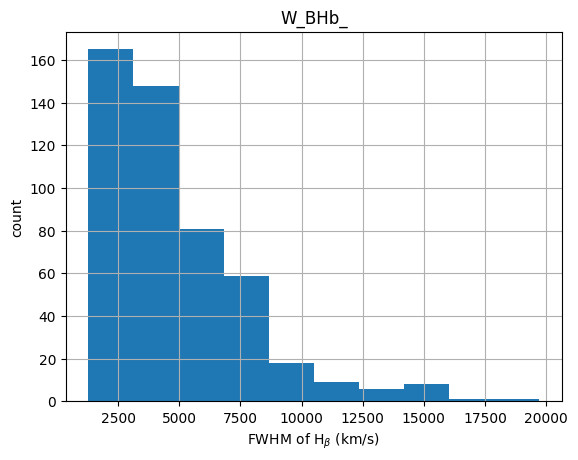

In [189]:
qso.hist(column='W_BHb_', bins=10)
plt.xlabel(r'FWHM of H$_\beta$ (km/s)')
plt.ylabel('count')

Our sample has broadline regions, since FWHM > 1000 km/s

Text(0, 0.5, 'count')

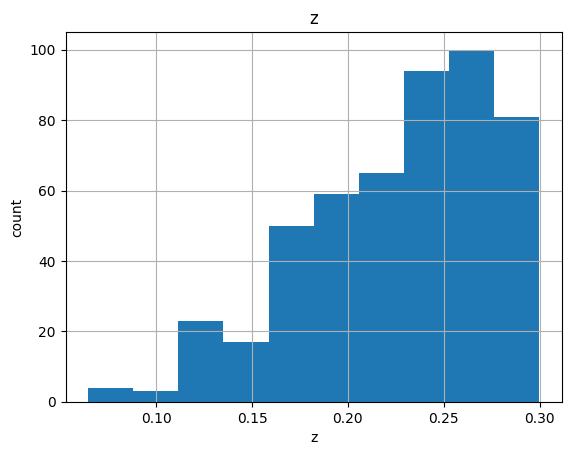

In [190]:
qso.hist(column='z', bins=10)
plt.xlabel('z')
plt.ylabel('count')

The plot follows the previously observed trend of increase in Quasar population with z.

<img src="https://www.researchgate.net/profile/Peter-Jackson-17/publication/275970919/figure/fig2/AS:667863744536576@1536242533000/Quasar-population-distribution-for-redshift-z-14-from-the-46-000-SDSS-DR4-2QZ.png" width=500 height=300>

Source: Jackson et al (2015), A CYCLIC MODEL OF GALAXY EVOLUTION WITH BARS

Text(0, 0.5, 'count')

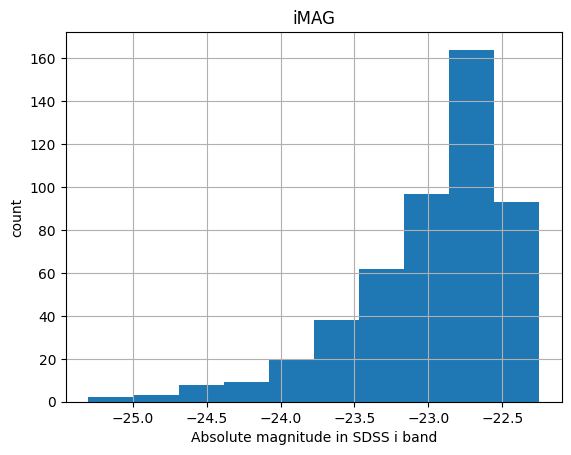

In [191]:
qso.hist(column='iMAG', bins=10)
plt.xlabel('Absolute magnitude in SDSS i band')
plt.ylabel('count')

Text(0.5, 1.0, 'Magnitude vs redshift')

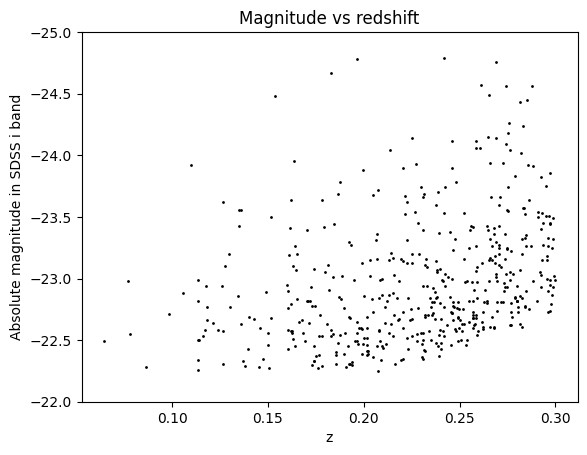

In [192]:
plt.scatter(qso['z'], qso['iMAG'], s=1, c='k')
plt.ylim(-22,-25)
plt.xlabel('z')
plt.ylabel('Absolute magnitude in SDSS i band')
plt.title("Magnitude vs redshift")

The sample's limitation to nearby quasars and in number did not reveal obvious trend in magnitude seen in the Shen et al paper. So we query Shen's catalog to understand this.

In [19]:
from astroquery.vizier import Vizier

catalogs = Vizier(catalog='J/ApJS/194/45', row_limit=-1, columns=['all']).query_constraints()
interesting_table = catalogs['J/ApJS/194/45/catalog']
shen11_full = interesting_table.to_pandas()
shen11_full.to_csv("shen11_full.txt", sep='\t')

In [57]:
# for dimension checks later in exercise

interesting_table.info

<Table length=105783>
    name     dtype      unit      format                                                    description                                                   n_bad 
----------- ------- ------------ -------- --------------------------------------------------------------------------------------------------------------- ------
      recno   int32                                                     Record number assigned by the VizieR team. Should Not be used for identification.      0
       SDSS   str18                                                                                             SDSS-DR7 name (HHMMSS.ss+DDMMSS.s; J2000)      0
    RAJ2000 float64          deg  {:9.5f}                                                                      Right ascension in decimal degrees (J2000)      0
    DEJ2000 float64          deg  {:9.5f}                                                                          Declination in decimal degrees (J2000)      0
          z 

Text(0.5, 1.0, 'Magnitude vs redshift')

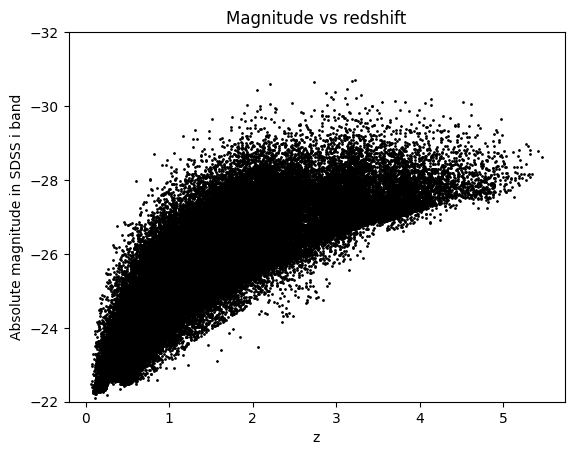

In [21]:
plt.scatter(shen11_full['z'], shen11_full['iMAG'], s=1, c='k')
plt.xlabel('z')
plt.ylabel('Absolute magnitude in SDSS i band')
plt.ylim(-22,-32)
plt.title("Magnitude vs redshift")

Text(0.5, 1.0, 'Magnitude vs redshift')

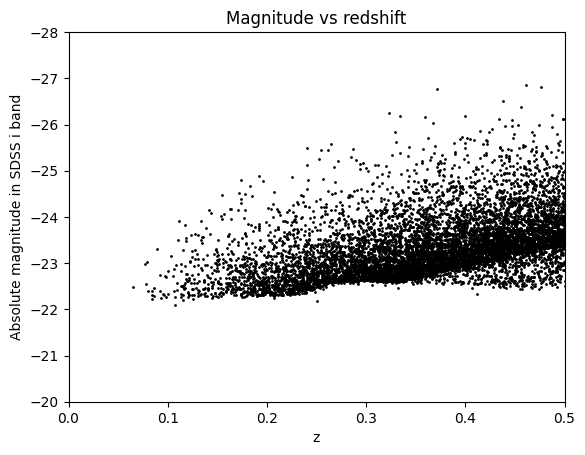

In [24]:
plt.scatter(shen11_full['z'], shen11_full['iMAG'], s=1, c='k')
plt.xlabel('z')
plt.ylabel('Absolute magnitude in SDSS i band')
plt.ylim(-20,-28)
plt.xlim(0, 0.5)
plt.title("Magnitude vs redshift")

There seems to be a correlation between the redshift and the minimum brightness of a quasar. For nearby quasars up to 0.25 - 0.3 z, the minimum seems to be a constant around -22 mags. 

Comparing with this plot for apparent magnitudes vs redshift, where the black line is the cosmological redshift-distance modulus line:

<img src="https://johnhartnettdotorg.files.wordpress.com/2014/05/hubble-qsos-and-galaxies-copy.png" width=500 height=400>

Source: [What do quasars tell us about the universe?, Hartnett (2014)](https://biblescienceforum.com/2014/05/10/what-do-quasars-tell-us-about-the-universe/)

This change in trend after 0.3 z could be due to an intrinsic source in redshift at higher z (Hartnett (2014)).

### 1.b)&c) Black hole mass using scaling relations from photo-reverberation studies

In [25]:
import astropy.constants as const
import astropy.units as u

In [261]:
# Calculating luminosity distance in cm 
# and luminosity of H beta line in erg/s, based on Hogg (2000)

H_0 = 67.8 * u.km / u.s / u.Mpc
D_H = (const.c/H_0).to(u.cm)

qso['d_L_der'] = qso['z'] * D_H.value

qso['L_Hb_der'] = 4 * np.pi * qso['Flux_Hb'] * (qso['d_L_der'])**2

In [205]:
print(qso.loc[10,'d_L_der'],  qso.loc[10,'z'] * D_H, qso.loc[10,'L_Hb_der'])

2.624511140533168e+27 2.624511140533168e+27 cm 9.909875338022698e+41


Known issue: [astropy units are lost in certain operations](https://docs.astropy.org/en/stable/known_issues.html). Hence, we are removing units from further operations.

Text(0.5, 1.0, 'Comparing our result and Shen 2001')

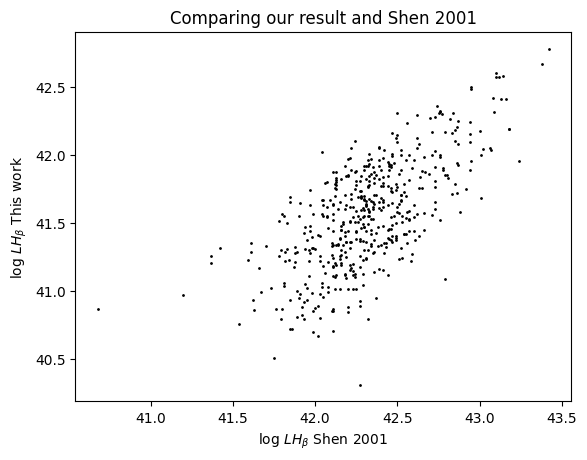

In [204]:
# Comparing our derived result with Shen (2011) results

plt.scatter(qso['logLBHb'], np.log10(qso['L_Hb_der']), s=1, c='k')
plt.xlabel(r'log $L H_{\beta}$ Shen 2001')
plt.ylabel(r'log $L H_{\beta}$ This work')
plt.title("Comparing our result and Shen 2001")

We underestimated by half an order of magnitude compared to Shen (2011).

In [262]:
# Obtaining black hole mass in solar masses based on Wu (2009)

qso['M_BH_der'] = 2.4 * 10**6 * (qso['L_Hb_der'] / 10**42)**0.59 * (qso['FWHM_Hb'] / 10**3)**2

In [263]:
for ind, M in zip(qso.index, qso['M_BH_der']):
    try:
        qso.loc[ind, 'logM_BH_der'] = np.log10(M)
    except AttributeError:
        print (M, ind)
        continue

Text(0.5, 1.0, 'Comparing our result and Shen 2001')

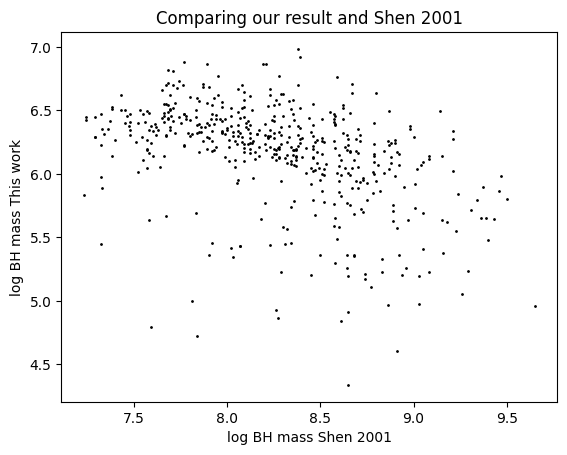

In [213]:
# Comparing our derived result with Shen (2011) results

plt.scatter(qso['logBH'], qso['logM_BH_der'], s=1, c='k')
plt.xlabel('log BH mass Shen 2001')
plt.ylabel('log BH mass This work')
plt.title("Comparing our result and Shen 2001")

Our estimate of BH mass does not agree with Shen 2011.

In [264]:
# Obtaining bolometric luminosity based on Wu (2009)

qso['logLbol_der'] = (0.94 * np.log10(qso['L_Hb_der'])) + 5.39

Text(0.5, 1.0, 'Comparing our result and Shen 2001')

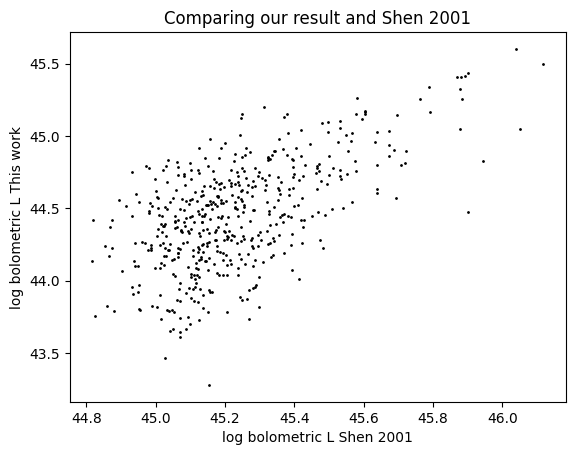

In [223]:
# 10^-7 W (Shen 2001) = 1 erg/s (This work)

plt.scatter(qso['logLbol'], qso['logLbol_der'], s=1, c='k')
plt.xlabel('log bolometric L Shen 2001')
plt.ylabel('log bolometric L This work')
plt.title("Comparing our result and Shen 2001")

Like in the case of Luminosity of H beta line, our estimates vary from Shen 2011 by appx half an order of magnitude.

In [266]:
L_Sun =  (const.L_sun.to(u.erg / u.s)).value
qso['L_ed_der'] = 3.2 * 10**4 * qso['M_BH_der'] * L_Sun

In [267]:
# Calculating Eddington ratio

for ind, logLbol, L_ed in zip(qso.index, qso['logLbol_der'], qso['L_ed_der']):
    qso.loc[ind, 'lambda_der'] = (10**logLbol)/L_ed

Text(0.5, 1.0, 'Comparing our result and Shen 2001')

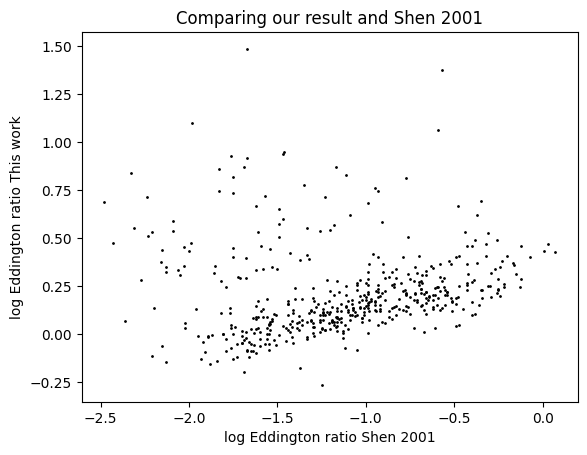

In [271]:
plt.scatter(qso['logEdd'], np.log10(qso['lambda_der']), s=1, c='k')
plt.xlabel('log Eddington ratio Shen 2001')
plt.ylabel('log Eddington ratio This work')
plt.title("Comparing our result and Shen 2001")

Text(0, 0.5, 'count')

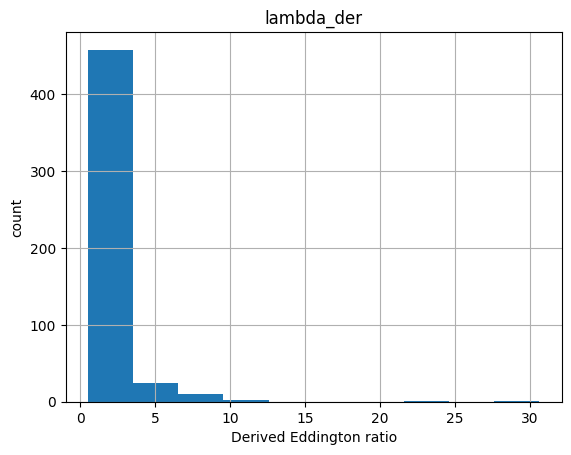

In [269]:
qso.hist(column='lambda_der', bins=10)
plt.xlabel('Derived Eddington ratio')
plt.ylabel('count')

Text(0, 0.5, 'count')

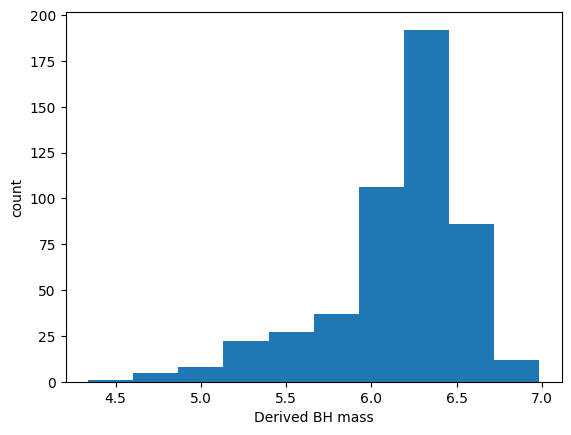

In [247]:
#qso.hist(column='M_BH_der', bins=10) ## raises TypeError
plt.hist(qso['logM_BH_der'], bins=10)
plt.xlabel('Derived BH mass')
plt.ylabel('count')

Text(0, 0.5, 'count')

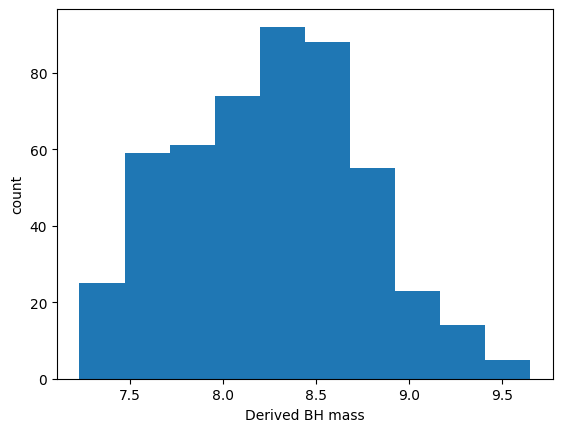

In [246]:
plt.hist(qso['logBH'], bins=10)
plt.xlabel('Derived BH mass')
plt.ylabel('count')

Our BH mass is underestimated by ~2 orders of magnitude compared to Shen 2011.

### Black hole mass using host bulge luminosity

In [272]:
from astroquery.simbad import Simbad

Simbad.add_votable_fields('otypes', 'flux(R)')
result_table = Simbad.query_bibobj('2009MNRAS.398.1905W').to_pandas()

wu09_simbad = result_table[['MAIN_ID', 'RA', 'DEC', 'OTYPES', 'FLUX_R']]

wu09_simbad.head()

,MAIN_ID,RA,DEC,OTYPES,FLUX_R
0,ICRF J002225.4+001456,00 22 25.4258,+00 14 56.163,BiC|QSO|G|Opt|Rad|Rad|X,NaN
1,3C 43,01 29 59.7696,+23 38 20.041,QSO|QSO|QSO|*|G|Opt|Rad,NaN
2,2MASS J01341690-4258262,01 34 16.9072,-42 58 26.223,NIR|MIR|Sy1|QSO|*|G|Rad|X,16.709999
3,3C 48,01 37 41.2996,+33 09 35.080,QSO|QSO|QSO|AGN|QSO|MIR|NIR|*|G|IR|Opt|Rad|Rad...,NaN
4,7C 022118.10+273638.00,02 24 12.2865,+27 50 11.538,QSO|AGN|Sy1|*|G|Rad,18.263000


In [273]:
from astroquery.ipac.ned import Ned

wu09_ned = Ned.query_refcode('2009MNRAS.398.1905W').to_pandas()

wu09_ned.head()

,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
0,1,4C +00.02,5.60594,0.24893,G,91731.0,0.305981,SLS,19.5,NaN,105,2,90,22,7,6,0
1,2,3C 043,22.49921,23.63897,QSO,437397.0,1.459000,SUN,19.0,NaN,194,7,122,19,8,0,0
2,3,WISEA J013416.90-425826.2,23.57042,-42.97417,G,71091.0,0.237134,SLS,16.0,NaN,40,2,34,8,4,0,0
3,4,3C 048,24.42208,33.15976,QSO,110623.0,0.369000,SLS,16.06,NaN,801,18,259,45,17,4,0
4,5,3C 067,36.05125,27.83654,G,92996.0,0.310200,SUN,18.0,NaN,193,8,100,19,6,1,0


In [274]:
# count function

import re

def count(str1, str2): 
    '''
    Counts how much percentage two strings match. 
    ------
    INPUT:
    ------
    str1, str2: strings
    ------
    OUTPUT:
    ------
    match: percentage match
    '''
    
    str1 = re.sub(r"[\u02BB\u02BC\u066C\u2018\u201A\u275B\u275C\u0027\u02B9\u02BB\u02BC\u02BE\u02C8\u02EE\u0301\u0313\u0315\u055A\u05F3\u07F4\u07F5\u1FBF\u2018\u2019\u2032\uA78C\uFF07]", "p", str1)
    str2 = re.sub(r"[\u02BB\u02BC\u066C\u2018\u201A\u275B\u275C\u0027\u02B9\u02BB\u02BC\u02BE\u02C8\u02EE\u0301\u0313\u0315\u055A\u05F3\u07F4\u07F5\u1FBF\u2018\u2019\u2032\uA78C\uFF07]", "p", str2)
    
    diff = len(str1) - len(str2)
    if diff < 0:
      temp = str1
      str1 = str2
      str2 = temp
    else:
      pass

    c, j = 0,0
    for i in str1:    
        if str2.find(i)>= 0 and j == str1.find(i): 
            c += 1
        j+=1
    
    if len(str1)>0:
        match = c/len(str1)*100
    else:
        match = 0

    return match

def stripcount(str1, str2): 
    '''
    Counts how much percentage two strings match excluding special characters 
    ------
    INPUT:
    ------
    str1, str2: strings
    ------
    OUTPUT:
    ------
    match: percentage match excluding special characters
    '''

    str1 = ''.join(i for i in str1 if i.isalnum()).lower() ## removes special characters
    str2 = ''.join(i for i in str2 if i.isalnum()).lower()

    diff = len(str1) - len(str2)
    if diff < 0:
      str1 = str1 + ("-"*diff)
    elif diff > 0:
      str2 = str2 + ("-"*diff)
    else:
      pass
    
    c, j = 0,0
    for i in str1:    
        if str2.find(i)>= 0 and j == str1.find(i): 
            c += 1
        j+=1
    
    if len(str1)>0:
        match = c/len(str1)*100
    else:
        match = 0

    return match

In [275]:
for n, i in enumerate(wu09_simbad['MAIN_ID']):
    for m, j in enumerate(wu09_ned['Object Name']):
        wu09_ned.loc[m, 'match'] = count(i, j)

    max_id = wu09_ned['match'].idxmax()
    wu09_simbad.loc[n, 'type_ned'] = wu09_ned.loc[max_id, 'Type']
    wu09_simbad.loc[n, 'z'] = wu09_ned.loc[max_id, 'Redshift']

In [296]:
wu09_simbad = wu09_simbad.rename(columns={'OTYPES': 'types_simbad', 'FLUX_R': 'mag_R_app'})
wu09_simbad_QSO = wu09_simbad[wu09_simbad['type_ned'] == 'QSO']
wu09_simbad_QSO = wu09_simbad[wu09_simbad['type_ned'] == 'QSO']
wu09_simbad_QSO_R = wu09_simbad_QSO[wu09_simbad_QSO['mag_R_app'] >0]

In [307]:
H_0 = 67.8 * u.km / u.s / u.Mpc
D_H = (const.c/H_0).to(u.parsec)

wu09_simbad_QSO_R['d_L'] = wu09_simbad_QSO_R['z'] * D_H

In [278]:
from dustmaps.sfd import SFDQuery
from astropy.coordinates import SkyCoord

def ebv(ra:str, dec:str):
    coords = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))
    sfd = SFDQuery()
    ebv = sfd(coords)

    return ebv

In [279]:
lambda_R = 6696
coeff_R = 2.28

In [309]:
wu09_simbad_QSO_R['mag_R_abs'] = - wu09_simbad_QSO_R['mag_R_app'] + coeff_R * ebv(wu09_simbad_QSO_R['RA'], wu09_simbad_QSO_R['DEC']) + 5 * np.log10(wu09_simbad_QSO_R['d_L']/10) # d in pc

In [310]:
wu09_simbad_QSO_R['logM_BH/M⊙'] = 0.5 * wu09_simbad_QSO_R['mag_R_abs'] - 2.74

wu09_simbad_QSO_R

,MAIN_ID,RA,DEC,types_simbad,mag_R_app,type_ned,z,d_L,mag_R_abs,M_BH/M⊙,logM_BH/M⊙
4,7C 022118.10+273638.00,02 24 12.2865,+27 50 11.538,QSO|AGN|Sy1|*|G|Rad,18.263000,QSO,2.003000,8.856700e+09,26.755185,1.344312e-12,10.637593
9,ICRF J052109.8+163822,05 21 09.8859,+16 38 22.051,QSO|AGN|Sy1|QSO|MIR|NIR|*|G|IR|Rad|Rad|Rad|Rad|X,18.480000,QSO,1.055000,4.664912e+09,25.528442,1.047130e-12,10.024221
11,ICRF J054236.1+495107,05 42 36.1378,+49 51 07.233,QSO|AGN|Sy1|QSO|MIR|smm|NIR|*|G|IR|Rad|Rad|Rad...,17.209999,QSO,1.055000,4.664912e+09,26.723543,4.518567e-12,10.621772
14,3C 186,07 44 17.4720,+37 53 17.250,QSO|QSO|QSO|QSO|MIR|*|G|Opt|Q?|Rad|Rad|Rad|UV|X,17.200001,QSO,0.759000,3.356084e+09,25.543785,4.570880e-12,10.031893
16,3C 190,08 01 33.5525,+14 14 42.813,QSO|QSO|QSO|MIR|*|G|Opt|Rad|Rad|Rad|X,18.972000,QSO,0.246393,1.089480e+09,21.285033,5.942924e-13,7.902516
22,ICRF J090933.4+425346,09 09 33.4971,+42 53 46.482,Bla|QSO|QSO|QSO|QSO|AGN|Sy2|NIR|QSO|MIR|AGN|*|...,18.219999,QSO,1.055000,4.664912e+09,25.167566,1.412539e-12,9.843783
26,7C 1144+3517,11 47 22.1297,+35 01 07.538,AGN|AGN|Bla|Sy2|AGN|Sy1|QSO|rG|rG|BLL|AGN|Bla|...,10.260000,QSO,0.545000,2.409836e+09,31.696017,1.348963e-08,13.108008
30,2E 2879,12 52 26.3561,+56 34 19.573,AGN|QSO|QSO|QSO|QSO|AGN|Sy1|QSO|MIR|NIR|AGN|*|...,17.660000,QSO,1.436208,6.350506e+09,26.379179,2.691537e-12,10.449589
33,ICRF J134733.3+121724,13 47 33.3616,+12 17 24.239,Sy1|QSO|BiC|rG|AGN|MIR|AGN|BiC|GiP|Sy2|*|G|IR|...,15.718000,QSO,1.065505,4.711362e+09,27.723965,2.517677e-11,11.121983
36,8C 1443+773,14 43 14.0,+77 07 28,QSO|AGN|Sy2|G|Rad,18.730000,QSO,0.545000,2.409836e+09,23.262770,7.852365e-13,8.891385


### References

- Shen et al. 2011 paper; https://ui.adsabs.harvard.edu/abs/2011ApJS..194...45S/abstract
- Wu 2009;  http://adsabs.harvard.edu/abs/2009MNRAS.398.1905W
- McLure & Dunlop 2002; http://adsabs.harvard.edu/abs/2002MNRAS.331..795M
- Hogg 2000; https://arxiv.org/abs/astro-ph/9905116 